In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
# Create a simple Dataset
X = np.array([[1,2], [1.5, 1.8], [5, 8], [8,8], [1, 0.6], [9, 11], [8,2], [10,2], [9,3]])

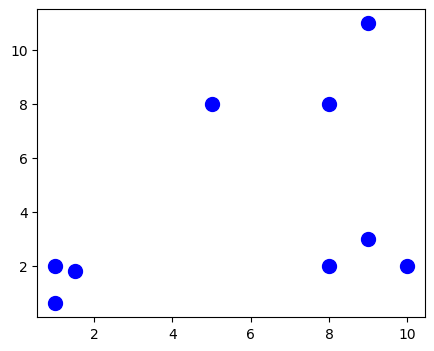

In [5]:
#Visualize the data points
plt.figure(figsize=(5,4))
plt.scatter(x=X[:, 0], y=X[:, 1], c='blue', s=100)
plt.show()

In [6]:
# Apply K-means algorithm with three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

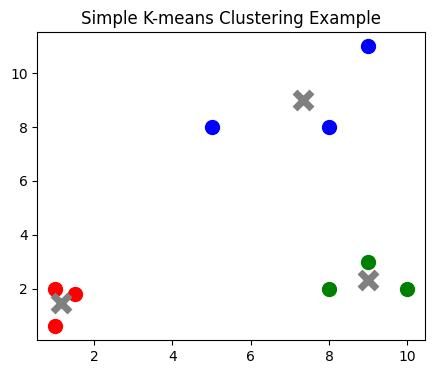

In [11]:
#Plotting the data points and cluster centers
plt.figure(figsize=(5,4))
colors = ['g','r','b']

# Plot each cluster
for i in range(len(X)):
  plt.scatter(X[i][0], X[i][1], c=colors[labels[i]], s=100)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=5, c='grey')

plt.title("Simple K-means Clustering Example")
plt.show()

In [12]:
df = pd.read_csv('student.csv')
df.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
# Extract relevant features for clustering
scores = df[['math_score', 'reading_score', 'writing_score']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scores)
df.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score,cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,2
4,male,group C,some college,standard,none,76,78,75,1


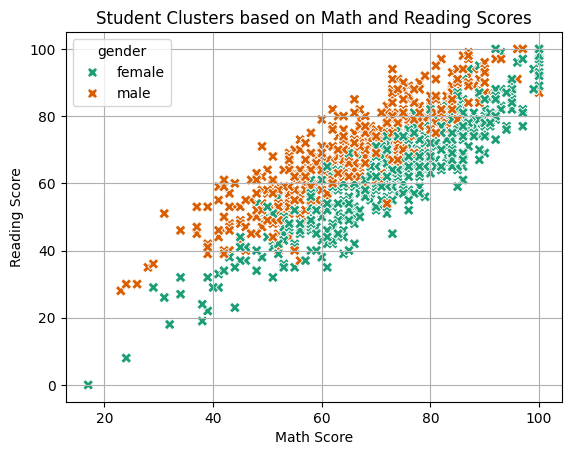

In [15]:
# Visualize the clusters in a 2D plot using two features for simplicity (math and reading scores)

sns.scatterplot(data=df, x='reading_score', y='math_score', hue='gender', s=60, palette='Dark2',
                marker='X')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Student Clusters based on Math and Reading Scores')
plt.grid()
plt.show()